In [3]:
from __future__ import absolute_import, division, print_function

from matplotlib import pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub
import os

from tensorflow.keras import layers
from tensorflow.keras import optimizers

import pandas as pd
import numpy as np

tf.VERSION

W0513 14:27:54.989939 140314714384192 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


'1.13.1'

In [6]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
train_data = image_generator.flow_from_directory("flower_photos")
validation_data = image_generator.flow_from_directory("flower_photos_test")

for image_batch,label_batch in image_data:
  print("Image batch shape: ", image_batch.shape)
  print("Labe batch shape: ", label_batch.shape)
  break

Found 3303 images belonging to 5 classes.
Found 367 images belonging to 5 classes.
Image batch shape:  (32, 256, 256, 3)
Labe batch shape:  (32, 5)


In [7]:
os.listdir(data_root)

['roses', 'tulips', 'dandelion', 'sunflowers', 'LICENSE.txt', 'daisy']

# Model Defintions

In [10]:
# CNN 2
model = tf.keras.Sequential([
  layers.Conv2D(32, [3, 3], (1, 1), 'valid', input_shape=(image_batch.shape[1], image_batch.shape[2], image_batch.shape[3])),
  layers.LeakyReLU(alpha=0.3),
  layers.MaxPooling2D(pool_size=(2 , 2)),
  
  layers.Conv2D(64, [3, 3], (1, 1), 'valid'),
  layers.LeakyReLU(alpha=0.3),
  layers.MaxPooling2D(pool_size=(2 , 2)),
    
  layers.Conv2D(128, [3, 3], (1, 1), 'valid'),
  layers.LeakyReLU(alpha=0.3),
  layers.Flatten(),
    
  layers.Dense(image_data.num_classes, activation='softmax')
])

# Model Compilations

In [12]:
model.compile(
  optimizer=tf.train.AdamOptimizer(), 
  loss='categorical_crossentropy',
  # loss='mean_squared_error',
  metrics=['accuracy'])

In [37]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(
  optimizer=sgd, 
  # loss='categorical_crossentropy',
  loss='mean_squared_error',
  metrics=['accuracy'])

In [13]:
class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses = []
    self.batch_acc = []
    self.epoch_val_loss = []
    self.epoch_val_acc = []
    
  def on_batch_end(self, batch, logs=None):
    self.batch_losses.append(logs['loss'])
    self.batch_acc.append(logs['acc'])
  def on_epoch_end(self, epoch, logs=None):
    self.epoch_val_loss.append(logs['val_loss'])
    self.epoch_val_acc.append(logs['val_acc'])

In [14]:
steps_per_epoch = image_data.samples//image_data.batch_size
batch_stats = CollectBatchStats()
trainHistory = model.fit_generator(train_data, epochs=4, 
                    callbacks = [batch_stats],
                     validation_data = validation_data)
'''
steps_per_epoch = image_data.samples//image_data.batch_size
batch_stats = CollectBatchStats()
trainHistory = model.fit(image_data, epochs=2, 
                    callbacks = [batch_stats],
                     validation_split=0.1)
'''

Instructions for updating:
Use tf.cast instead.


W0513 14:28:10.473981 140314714384192 deprecation.py:323] From /opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Epoch 1/4
104/104 [==============================] - 826s 8s/step - loss: 2.8130 - acc: 0.4208 - val_loss: 1.1505 - val_acc: 0.4986
Epoch 2/4
104/104 [==============================] - 827s 8s/step - loss: 0.9555 - acc: 0.6394 - val_loss: 1.1173 - val_acc: 0.5749
Epoch 3/4
104/104 [==============================] - 827s 8s/step - loss: 0.6719 - acc: 0.7648 - val_loss: 1.1780 - val_acc: 0.5586
Epoch 4/4
104/104 [==============================] - 866s 8s/step - loss: 0.3607 - acc: 0.8801 - val_loss: 1.3473 - val_acc: 0.5613


'\nsteps_per_epoch = image_data.samples//image_data.batch_size\nbatch_stats = CollectBatchStats()\ntrainHistory = model.fit(image_data, epochs=2, \n                    callbacks = [batch_stats],\n                     validation_split=0.1)\n'

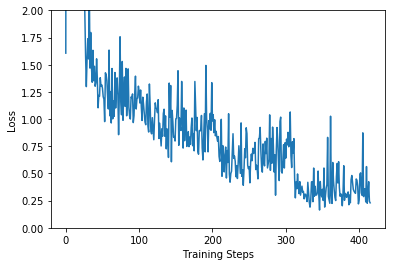

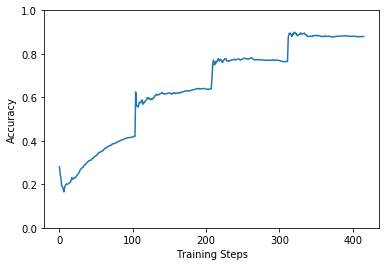

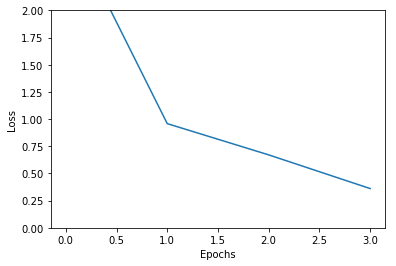

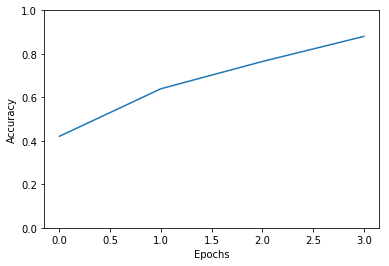

In [15]:
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(batch_stats.batch_losses)

plt.figure()
plt.ylabel("Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(batch_stats.batch_acc)

plt.figure()
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.ylim([0,2])
plt.plot(trainHistory.history['loss'])

plt.figure()
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(trainHistory.history['acc'])

## Saving the data (loss and accuracy) so I can make plots and compare models -C

Keep in mind you'll overwrite previous data if you do not rename the file.

In [17]:
results = pd.DataFrame({"losses":batch_stats.batch_losses, "accuracy":batch_stats.batch_acc})
results.to_csv("saved_results/someData.csv", ',')
results = pd.DataFrame({"losses":batch_stats.epoch_val_loss, "accuracy":batch_stats.epoch_val_acc})
results.to_csv("saved_results/someValData.csv", ',')